In [1]:
from matplotlib import pyplot as plt
import os 
import matplotlib.image as mpimg
import cv2
import pandas as pd

In [2]:
PATH = 'surfaces'
classes = ['Ok', 'Defects']

In [3]:
piezas = os.listdir(PATH)
piezas.sort()
piezas

['Piece01', 'Piece02', 'Piece03', 'Piece04']

In [4]:
piezas_imgs = []
for p in piezas:
    imgs = [f for f in os.listdir(os.path.join(PATH,p)) if os.path.isfile(os.path.join(PATH,p,f))]
    piezas_imgs.append(os.path.join(PATH,p,imgs[0]))

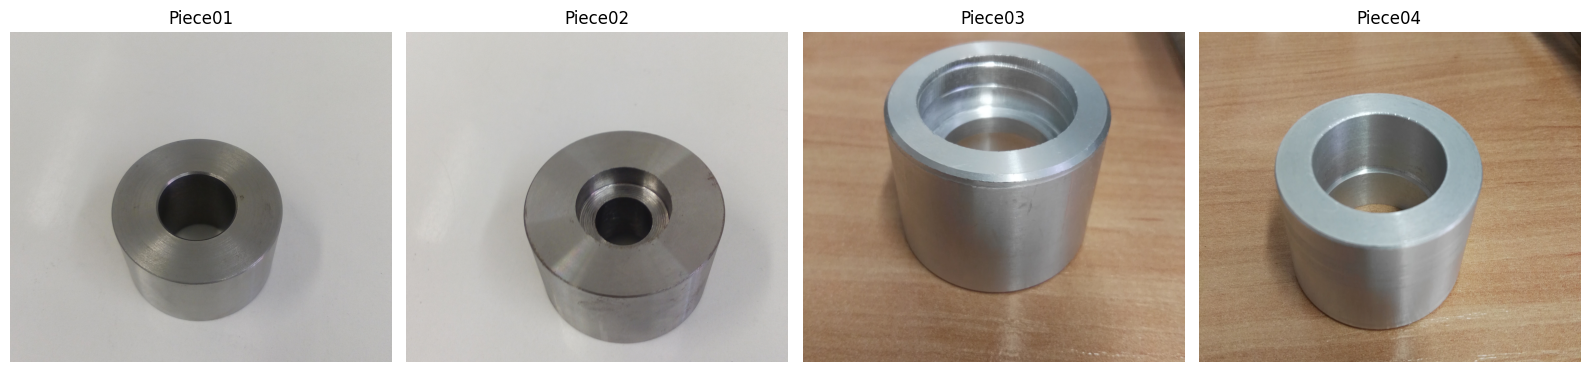

In [5]:
# Crear el subplot 1x4
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

def recorte_vertical(img, porcentaje=0.2):
    alto = img.shape[0]
    recorte = int(alto * porcentaje)
    return img[recorte:alto-recorte, :]

for i, ax in enumerate(axs):
    img = mpimg.imread(piezas_imgs[i])
    i_h, i_w, _ = img.shape
    if i_w/i_h==0.75:
        img_recortada = recorte_vertical(img, porcentaje=0.2)
    else:
        img_recortada = recorte_vertical(img, porcentaje=0.25)
    resized_image = cv2.resize(img_recortada, (1500, 1300))
    ax.imshow(resized_image)
    ax.set_title(piezas[i])
    ax.axis('off')

plt.tight_layout()
plt.savefig('img_piezas.png', dpi=200)
plt.show()

In [6]:
columns = ['pieza',  'type', 'path', 'file']
df = pd.DataFrame(columns=columns)
for p in piezas:
    for c in classes:
        images = [[p,c,os.path.join(PATH,p,c,i), i]for i in os.listdir(os.path.join(PATH,p,c))]
        dfp = pd.DataFrame(images, columns=columns)
        df = pd.concat([df,dfp])

In [7]:
df.head()

,pieza,type,path,file
0,Piece01,Defects,surfaces\Piece01\Defects\foto211.tif,foto211.tif
1,Piece01,Defects,surfaces\Piece01\Defects\foto316.tif,foto316.tif
2,Piece01,Defects,surfaces\Piece01\Defects\foto284.tif,foto284.tif
3,Piece01,Defects,surfaces\Piece01\Defects\foto359.tif,foto359.tif
4,Piece01,Defects,surfaces\Piece01\Defects\foto623.tif,foto623.tif


In [11]:
conteo = df.groupby(['pieza', 'type']).size().unstack(fill_value=0)
for c in classes:
    df_c = df[df['type']==c]
    if c == 'Defects':
        conteo = conteo.rename(columns={'Defects':'Defects ('+ str(df_c.shape[0])+')'})
    else:
        conteo = conteo.rename(columns={'Ok':'No Defects ('+ str(df_c.shape[0])+')'})

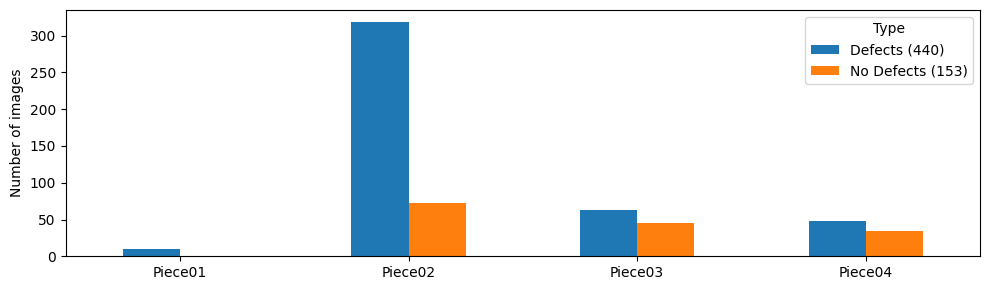

In [12]:
# Genera la gráfica
ax = conteo.plot(kind='bar', figsize=(10, 3))
ax.set_xlabel('')
ax.set_ylabel('Number of images')
ax.legend(title='Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('img_piezas_number.png', dpi=200)
plt.show()

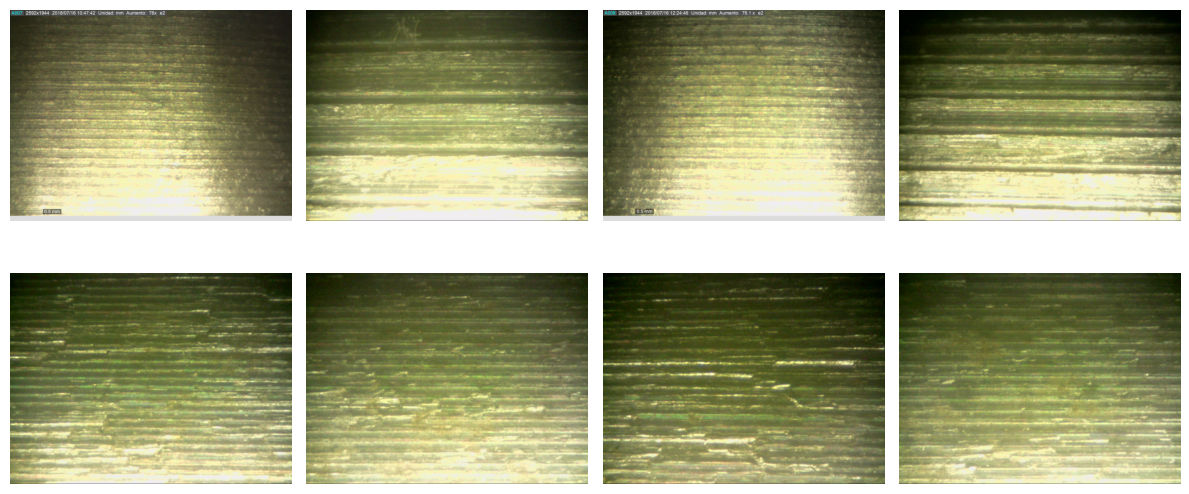

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for r,c in enumerate(classes):
    df_c = df[df['type']==c]
    for i,i_n in enumerate([100,32,132,54]):
        img_path = df_c.iloc[i_n]['path']
        img = plt.imread(img_path)
        axs[r][i].imshow(img)
        axs[r][i].axis('off')
plt.tight_layout()
plt.savefig('img_piezas_types.png', dpi=200)
plt.show()